# Toxic Comment Classification Challenge

This is my submission to the Toxic Comment Classification Challenge (https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/).   


## Data exploration

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

##### Read data as dataframes with pandas

In [2]:
df_train = pd.read_table('data/train.csv',sep=',',header=0)
df_test = pd.read_table('data/test.csv',sep=',',header=0)
df_sample_sub = pd.read_table('data/sample_submission.csv',sep=',',header=0)

In [3]:
print("Dimensions of the train dataframe:",df_train.shape)

Dimensions of the train dataframe: (159571, 8)


In [4]:
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
print("The training dataset contains",df_train.shape[0],"examples.")
print("The dataframe is composed of",df_train.shape[1],"columns :")
for i in range(len(df_train.columns)): print(df_train.columns[i])
print("Each row represents a comment with an id, the text of the comment, and 6 labels to predict.")

The training dataset contains 159571 examples.
The dataframe is composed of 8 columns :
id
comment_text
toxic
severe_toxic
obscene
threat
insult
identity_hate
Each row represents a comment with an id, the text of the comment, and 6 labels to predict.


Split the training dataframe into id, data (x) and labels (y) dataframes :

In [6]:
id_train = df_train['id']
x_train = df_train['comment_text']
y_train = df_train.iloc[:, 2:]

##### explore the labels of the training data

Show the proportion of comments tagged for each label in the training dataset :

In [7]:
for i in range(y_train.shape[1]):
    print("Proportion of",y_train.columns[i],"comments in the train dataset :",y_train[y_train.columns[i]].mean())

Proportion of toxic comments in the train dataset : 0.09584448302009764
Proportion of severe_toxic comments in the train dataset : 0.009995550569965721
Proportion of obscene comments in the train dataset : 0.052948217407925
Proportion of threat comments in the train dataset : 0.002995531769557125
Proportion of insult comments in the train dataset : 0.04936360616904074
Proportion of identity_hate comments in the train dataset : 0.00880485802558109


Represent the number of occurences for each label in the training dataset :

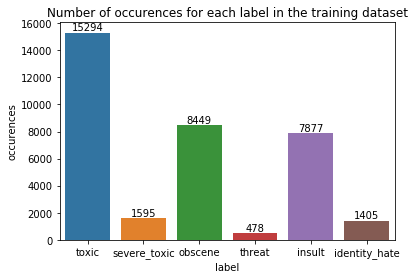

In [8]:
y_sum = y_train.sum()

plt.figure()

fig = sns.barplot(y_sum.index, y_sum.values)
plt.title('Number of occurences for each label in the training dataset')
plt.ylabel("occurences")
plt.xlabel('label')
rects = fig.patches
labels = y_sum.values

for rect, label in zip(rects, labels):
    height = rect.get_height()
    fig.text(rect.get_x() + rect.get_width()/2, height + 10, label, 
            ha='center', va='bottom')

plt.show()

Show the correlation between the labels :

In [9]:
correlation = y_train.corr()
correlation

,toxic,severe_toxic,obscene,threat,insult,identity_hate
toxic,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
severe_toxic,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
obscene,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
insult,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
identity_hate,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


The correlation matrix shows that a comment may have been tagged with several labels. So, it is a multi-class classification problem.

##### explore the training comments texts

count    159571.000000
mean        394.073221
std         590.720282
min           6.000000
25%          96.000000
50%         205.000000
75%         435.000000
max        5000.000000
Name: comment_text, dtype: float64


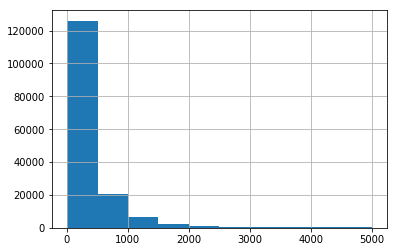

In [10]:
com_length = x_train.str.len()
print(com_length.describe())
com_length.hist()

This analyse shows that the length of the comments is very variable. Some comments are very long, while others contain only a few characters.